# Viterbi Algorithm

In [40]:
import numpy as np

### Test example for Viterbi Algorithm

In [41]:
# Transition matrix
transition_matrix = {'F':{'F':0.6, 'L':0.4}, 'L':{'F':0.4, 'L':0.6}}
# Emission matrix
emission_matrix = {'F':{'H':0.5, 'T':0.5}, 'L':{'H':0.8, 'T':0.2}}
# Initial probabilities
initial_prob = {'F':0.5, 'L':0.5}
# Observation
observations = ['T', 'H', 'T', 'H', 'H', 'H', 'T', 'H', 'T', 'T', 'H']

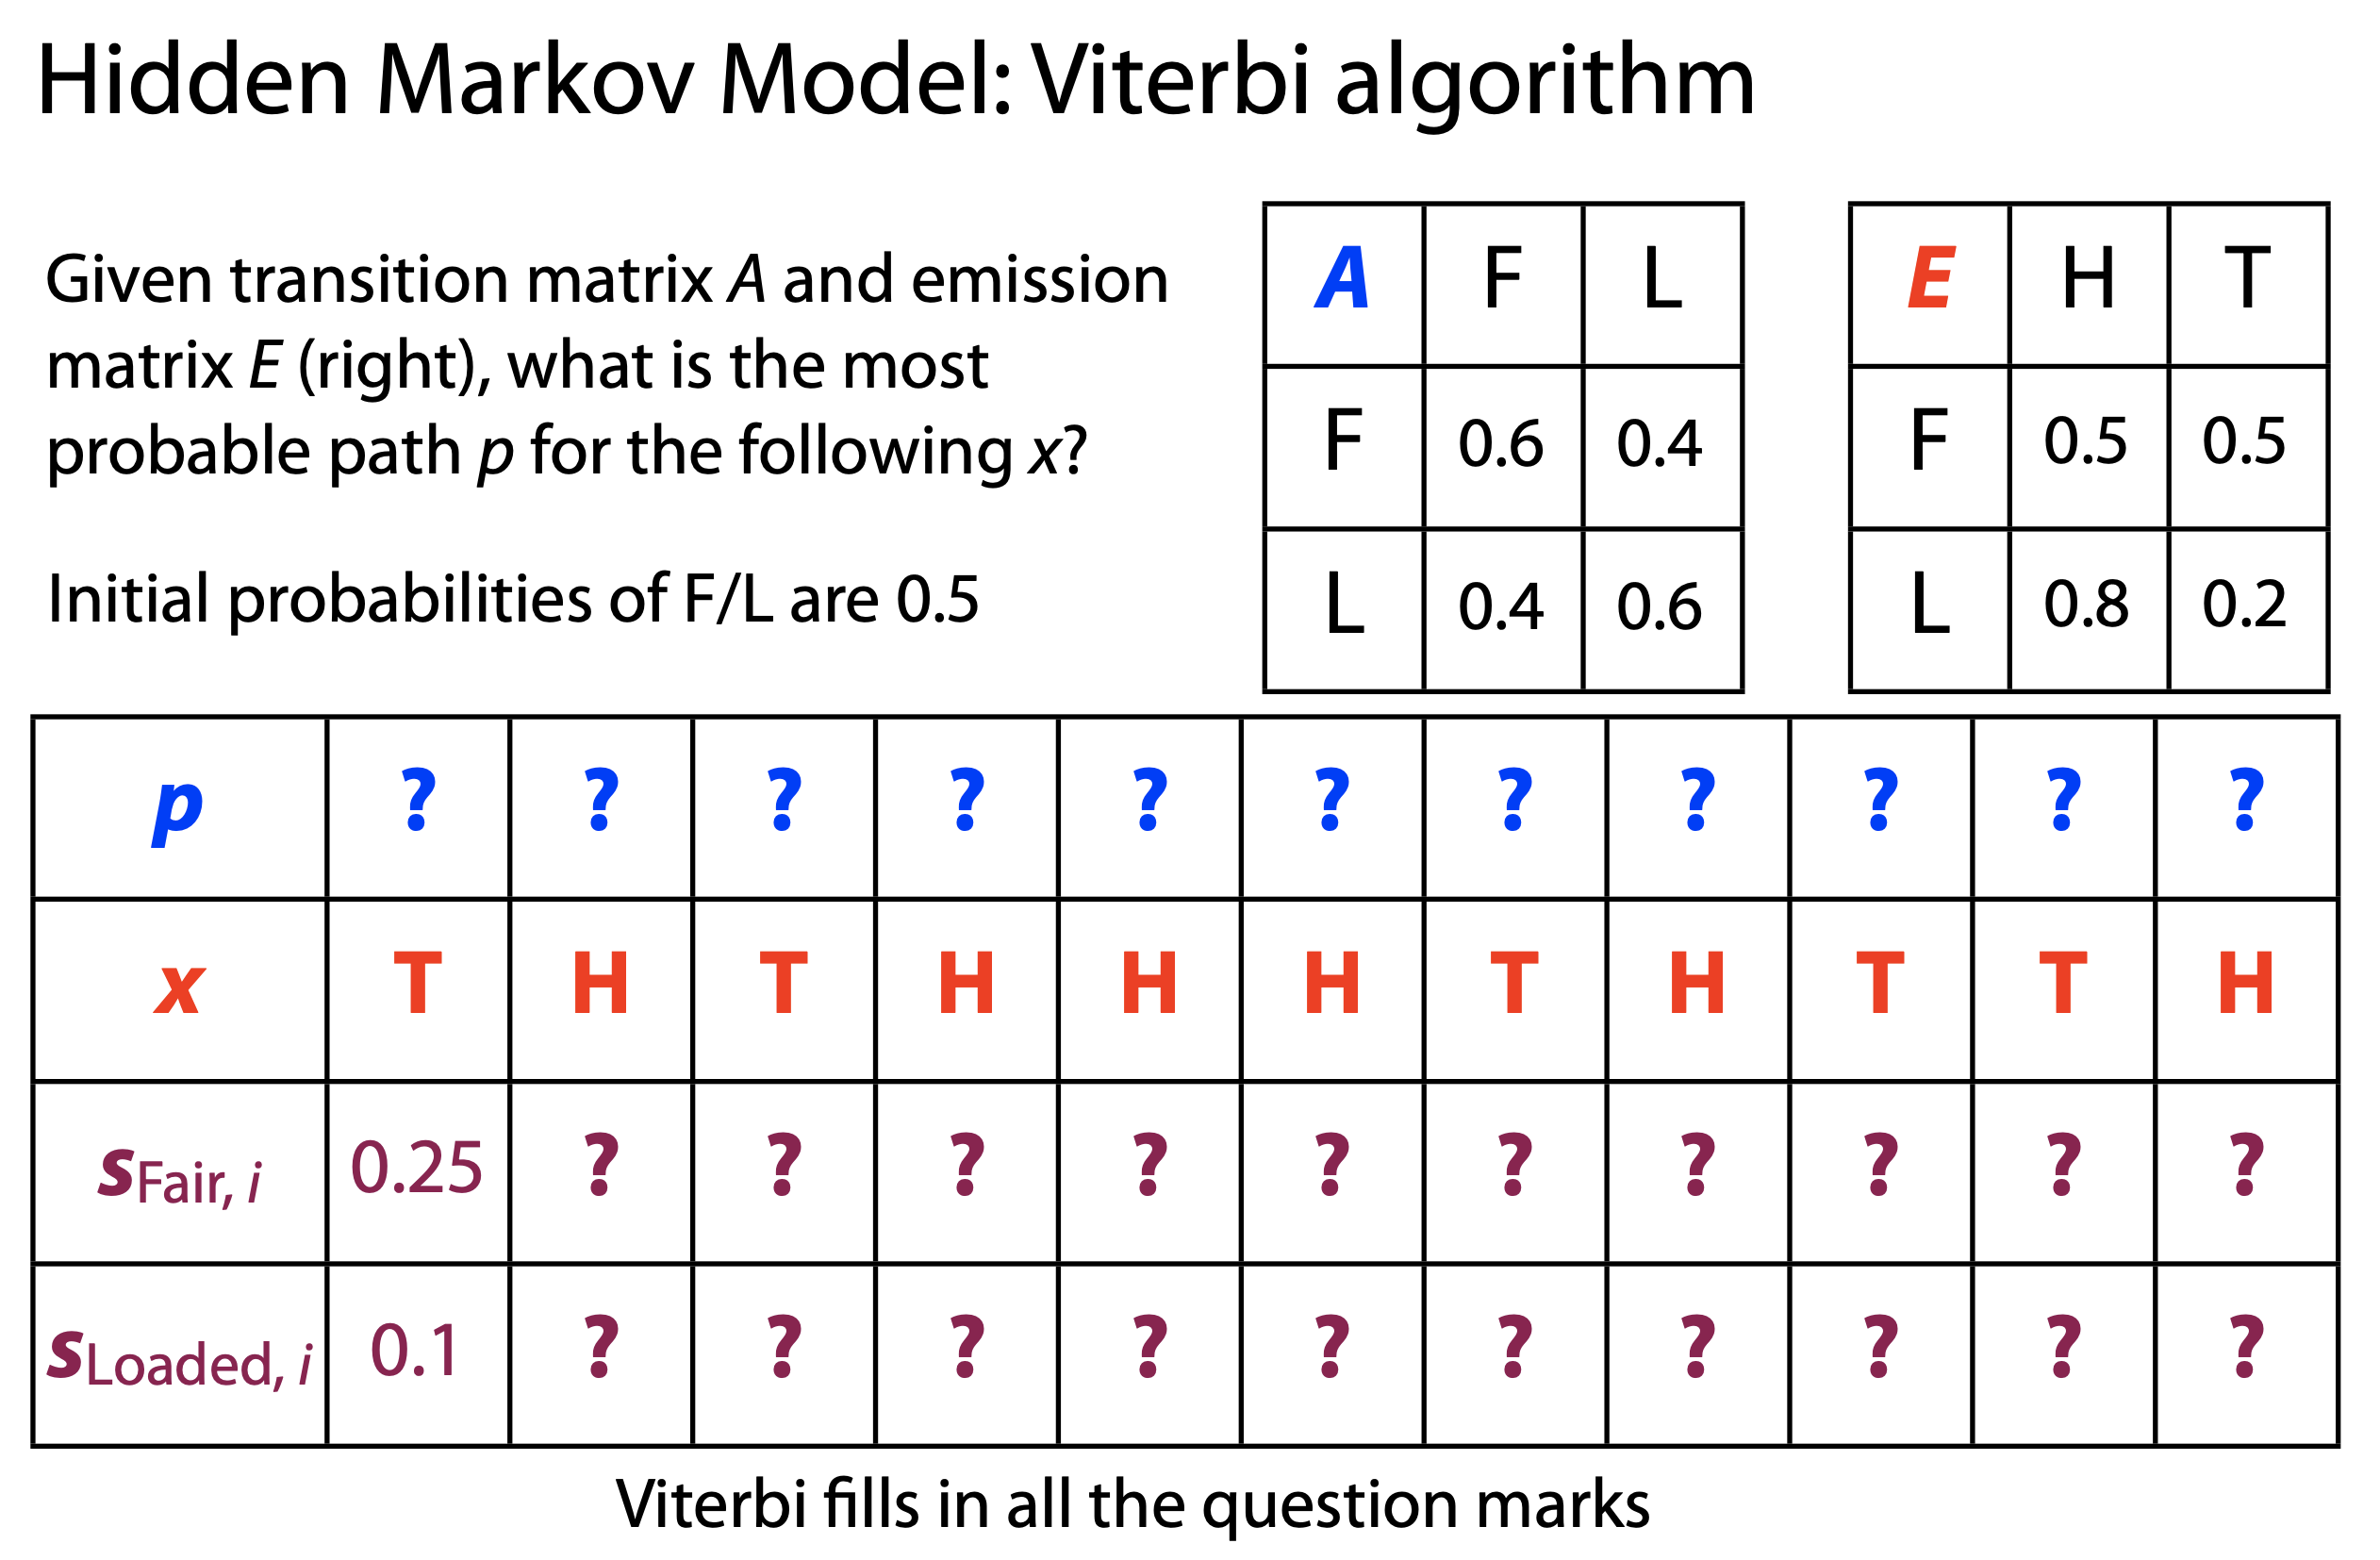

In [42]:
def viterbi(transition_matrix, emission_matrix, initial_prob, observations):
    # Initialize returning objects
    prediction_seq = []
    prediction_prob = 0
    # Initialize a dictionary for scores of each states
    scores = {i : [] for i in list(transition_matrix.keys())}
    # Fill in first scores column (start state to transition states probability)
    max_score = 0
    best_key = ''
    for key in scores:
        if key in emission_matrix or key in initial_prob:
          curr_observation = observations[0]
          score = emission_matrix[key][curr_observation]*initial_prob[key]
          scores[key].append(score)
          if score > max_score:
              max_score = score
              best_key = key
        else:
          scores[key].append(0.0)
    prediction_seq.append(best_key)
    # Update the rest of the scores
    for i in range(1, len(observations)): # For every column
        curr_observation = observations[i]
        for key in scores: # For every row
          if key in emission_matrix:
              state_scores = []
              for key2 in scores: # Finds all the cross probabilities
                  previous_score = scores[key2][i-1]
                  state_scores.append(previous_score*transition_matrix[key2][key]*emission_matrix[key][curr_observation])
              scores[key].append(max(state_scores))
          else:
            scores[key].append(0.0)
        # Adds the state to the prediction sequence
        max_score = 0
        best_key = ''
        for key in scores:
            score = scores[key][i]
            if score > max_score:
                max_score = score
                best_key = key
        prediction_seq.append(best_key)
    for key in scores:
        prob = scores[key][-1]
        if prob > prediction_prob:
            prediction_prob = prob
    #print(scores)
    return prediction_seq, prediction_prob

In [43]:
print('Predicted Sequence:', viterbi(transition_matrix, emission_matrix, initial_prob, observations)[0])
print('Probability:', viterbi(transition_matrix, emission_matrix, initial_prob, observations)[1])

Predicted Sequence: ['F', 'L', 'F', 'L', 'L', 'L', 'F', 'L', 'F', 'F', 'L']
Probability: 2.86654464e-06
